# **Data Analysis**

## **Imports**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
from PIL import Image

## **Parse TFRecords**

In [2]:
def parse_tfr(proto):
    feature_description = {
        'image': tf.io.VarLenFeature(tf.float32),
        'shape': tf.io.VarLenFeature(tf.int64),
        'label': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    }
    rec = tf.io.parse_single_example(proto, feature_description)
    shape = tf.sparse.to_dense(rec['shape'])
    img = tf.reshape(tf.sparse.to_dense(rec['image']), shape)
    label = rec['label']
    return img, label

file_patterns = ['data/train_images.tfrecords', 'data/val_images.tfrecords', 'data/test_images.tfrecords'] 

train_dataset = tf.data.TFRecordDataset(file_patterns[0])
train_dataset = train_dataset.map(parse_tfr)

val_dataset = tf.data.TFRecordDataset(file_patterns[1]) 
val_dataset = val_dataset.map(parse_tfr)

test_dataset = tf.data.TFRecordDataset(file_patterns[2]) 
test_dataset = test_dataset.map(parse_tfr)


## **Data Analysis**

### **Size of Datasets:**

#### **Number of all images:**

In [3]:
file_path = "Data\shuffled_labels.txt"

with open(file_path, "r") as file:
    line_count = sum(1 for line in file)

print(f"Total Dataset Size: {line_count}")


Total Dataset Size: 4268


#### **Size of all Datasets:**

In [4]:
NUM_TRAIN = sum(1 for _ in train_dataset)
NUM_VAL = sum(1 for _ in val_dataset)
NUM_TEST = sum(1 for _ in test_dataset)

print(f">> Number of examples in the training dataset: {NUM_TRAIN}")
print(f">> Number of examples in the validation dataset: {NUM_VAL}")
print(f">> Number of examples in the test dataset: {NUM_TEST}")
print(f">> Number of examples in the whole dataset: {NUM_TEST + NUM_TRAIN + NUM_VAL}")

>> Number of examples in the training dataset: 2987
>> Number of examples in the validation dataset: 640
>> Number of examples in the test dataset: 641
>> Number of examples in the whole dataset: 4268


### **Image Sizes**

In [5]:
image_size_counts = {}

for idx, (image, label_int) in enumerate(train_dataset):
    image_size = (image.shape[0], image.shape[1])
    
    if image_size in image_size_counts:
        image_size_counts[image_size] += 1
    else:
        image_size_counts[image_size] = 1

# Print out top 5 occuring image sizes
sorted_sizes = sorted(image_size_counts.items(), key=lambda x: x[1], reverse=True)

for size, count in sorted_sizes[:10]:
    print(f"Image Size {size[0]}x{size[1]} occurred {count} times")

Image Size 300x300 occurred 2700 times
Image Size 216x288 occurred 8 times
Image Size 238x317 occurred 7 times
Image Size 221x295 occurred 7 times
Image Size 295x221 occurred 6 times
Image Size 296x222 occurred 6 times
Image Size 303x227 occurred 6 times
Image Size 301x227 occurred 5 times
Image Size 223x298 occurred 5 times
Image Size 288x216 occurred 5 times


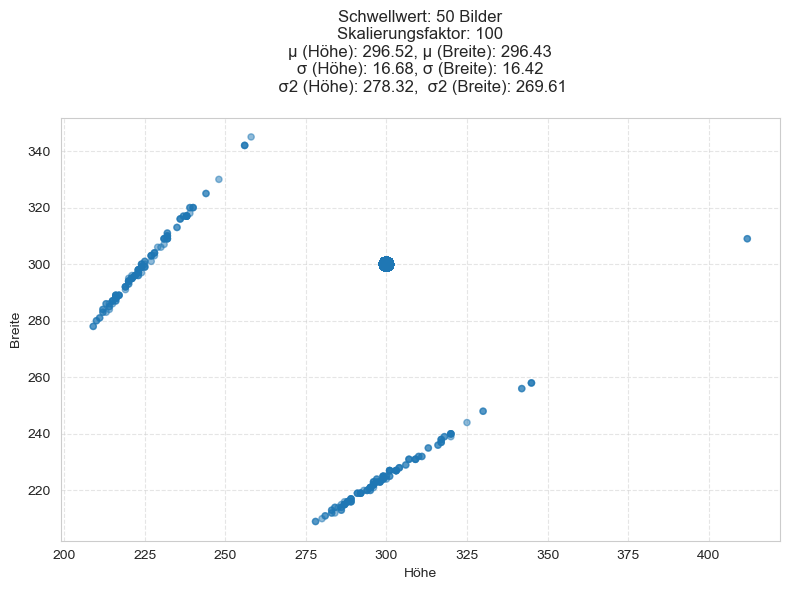

In [23]:
image_sizes = []
for idx, (image, label_int) in enumerate(train_dataset):
    image_size = (image.shape[0], image.shape[1])
    image_sizes.append(image_size)
    
heights = [size[0] for size in image_sizes]
widths = [size[1] for size in image_sizes]

variance_height = np.var(heights)
variance_width = np.var(widths)
std_deviation_height = np.std(heights)
std_deviation_width = np.std(widths)
mean_height = np.mean(heights)
mean_width = np.mean(widths)

image_size_counts = Counter(zip(heights, widths))

counts = [image_size_counts[size] for size in zip(heights, widths)]

threshold = 50  
scaling_factor = 100 

plt.figure(figsize=(8, 6))
marker_sizes = [scaling_factor if count > threshold else scaling_factor / 5 for count in counts]
plt.scatter(heights, widths, s=marker_sizes, alpha=0.5)
plt.xlabel("Höhe")
plt.ylabel("Breite")
#plt.xlim(200, 400)
#plt.ylim(200, 400)

# Include mean, std, and var in the title
title = f"Schwellwert: {threshold} Bilder\n"
title += f"Skalierungsfaktor: {scaling_factor}\n"
title += f"μ (Höhe): {mean_height:.2f}, μ (Breite): {mean_width:.2f}\n"
title += f"σ (Höhe): {std_deviation_height:.2f}, σ (Breite): {std_deviation_width:.2f}\n"
title += f" σ2 (Höhe): {variance_height:.2f},  σ2 (Breite): {variance_width:.2f}\n"

plt.title(title)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig(f"IMG/größe_bilder.png")
plt.show()

### **Categories**

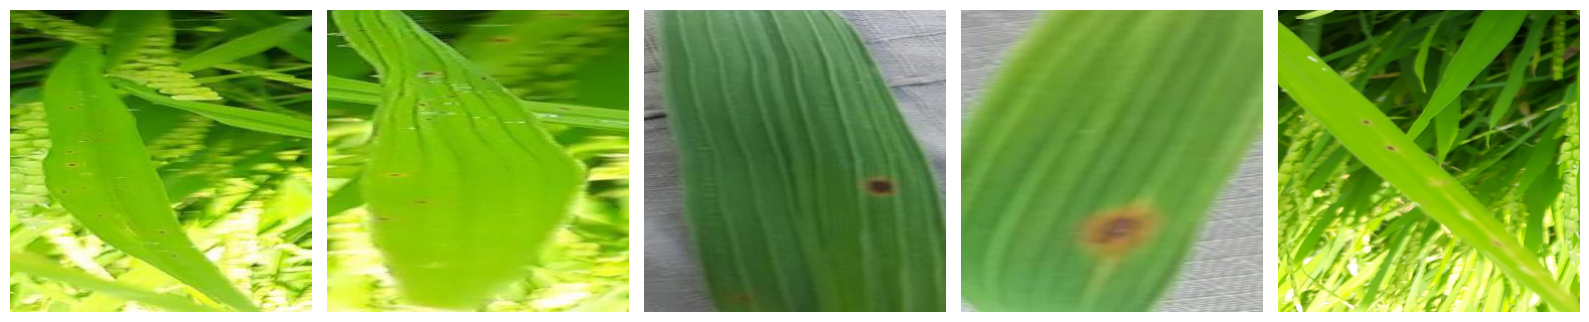

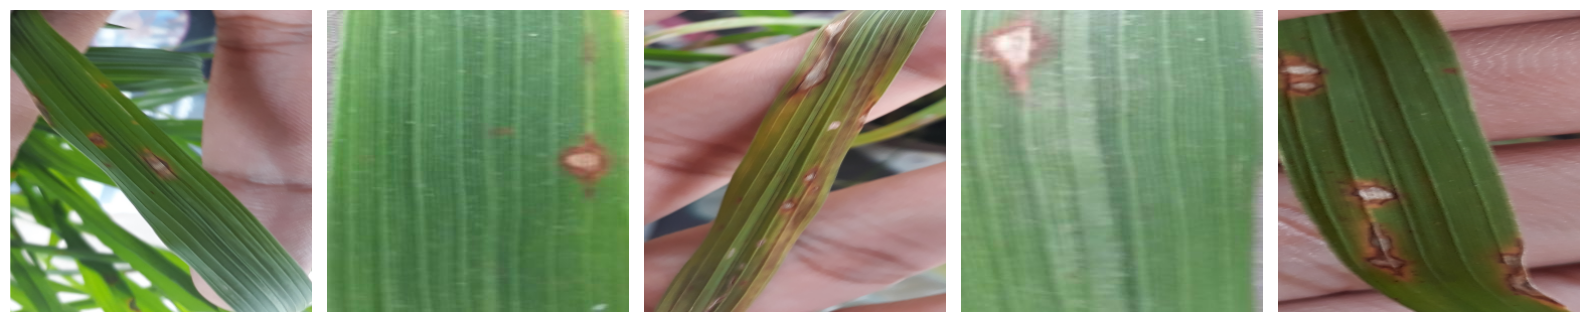

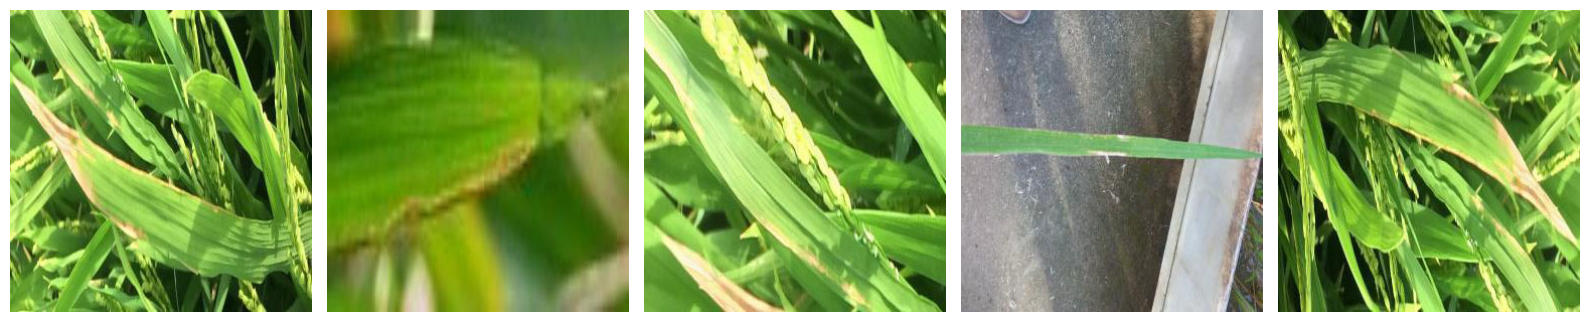

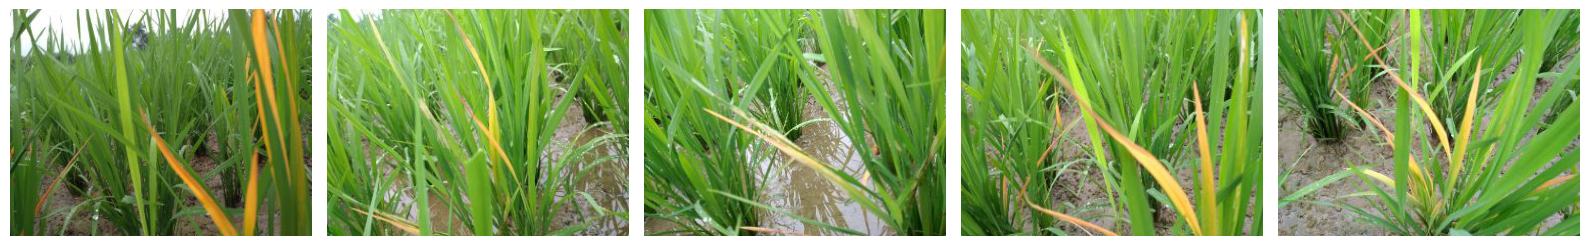

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

image_paths = [
    ["Data/Brownspot/brownspot_orig_001.jpg", "Data/Brownspot/brownspot_orig_005.jpg", "Data/Brownspot/brownspot_orig_016.jpg", "Data/Brownspot/brownspot_orig_027.jpg", "Data/Brownspot/brownspot_orig_008.jpg"],
    ["Data/Blast/BLAST1_002.jpg", "Data/Blast/BLAST1_003.jpg", "Data/Blast/BLAST1_004.jpg", "Data/Blast/BLAST1_005.jpg", "Data/Blast/BLAST1_006.jpg"],
    ["Data/All/BACTERAILBLIGHT3_004.jpg", "Data/All/BACTERAILBLIGHT3_001.jpg", "Data/All/BACTERAILBLIGHT3_006.jpg", "Data/All/BACTERAILBLIGHT3_027.jpg", "Data/All/BACTERAILBLIGHT3_018.jpg"],
    ["Data/Tungro/TUNGRO1_030.jpg", "Data/Tungro/TUNGRO1_015.jpg", "Data/Tungro/TUNGRO1_020.jpg", "Data/Tungro/TUNGRO1_033.jpg", "Data/Tungro/TUNGRO1_044.jpg"]
]

titles = ["Brownspot", "Blast", "Bacterial Blight", "Tungro"]

for i in range(len(image_paths)):
    fig, axes = plt.subplots(1, 5, figsize=(16, 4))
    for j in range(5):
        if j < len(image_paths[i]):
            image = Image.open(image_paths[i][j])
            axes[j].imshow(image)
            axes[j].axis('off')
    plt.tight_layout()
    
    plt.savefig(f"IMG/{titles[i]}_images.png", bbox_inches='tight')
    plt.show()



#### **Distribution of Categories**

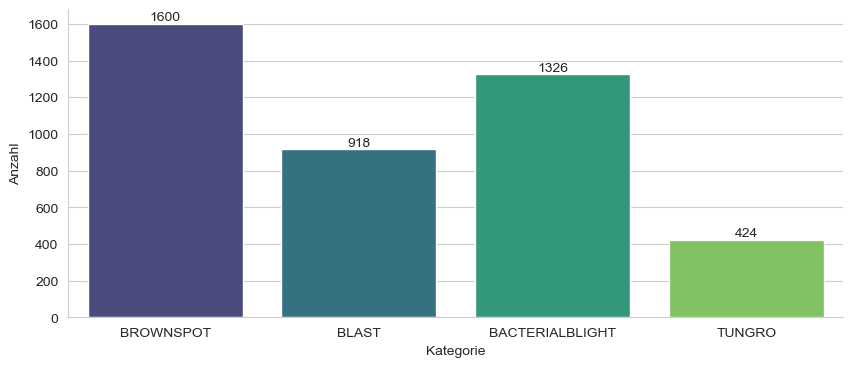

In [17]:
category_counts = defaultdict(int)

with open("Data/shuffled_labels.txt", "r") as file:
    for line in file:
        _, kategorie, _ = line.strip().split(",")
        category_counts[kategorie] += 1


data = pd.DataFrame({'Kategorie': list(category_counts.keys()), 'Anzahl': list(category_counts.values())})

plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")  
plot = sns.barplot(x='Kategorie', y='Anzahl', data=data, palette='viridis')
plt.xlabel("Kategorie")
plt.ylabel("Anzahl")
plt.xticks(rotation=0) 

for index, row in data.iterrows():
    plot.text(index, row['Anzahl'] + 1, row['Anzahl'], ha='center', va='bottom')


sns.despine(top=True, right=True)

plt.savefig(f"IMG/klassen_verteilung.png", bbox_inches='tight')


### **Class Imbalance Ratio**

In [15]:
cir = 1600 / 424
print(cir)

3.7735849056603774
